### Import all dependencies and libraries

In [125]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Transform source data to csv

In [126]:
# Importing library
import os

# Getting all the arff files from the current directory
files = [arff for arff in os.listdir('.') if arff.endswith(".arff")]

# Function for converting arff list to csv list
def toCsv(content):
    data = False
    header = ""
    newContent = []
    for line in content:
        if not data:
            if "@attribute" in line:
                attri = line.split()
                columnName = attri[attri.index("@attribute")+1]
                header = header + columnName + ","
            elif "@data" in line:
                data = True
                header = header[:-1]
                header += '\n'
                newContent.append(header)
        else:
            newContent.append(line)
    return newContent

# Main loop for reading and writing files
for file in files:
    with open(file , "r") as inFile:
        content = inFile.readlines()
        name,ext = os.path.splitext(inFile.name)
        new = toCsv(content)
        with open(name+".csv", "w") as outFile:
            outFile.writelines(new)

### Import data visualize data

In [127]:
import pandas as pd 
df = pd.read_csv("Behavior of the urban traffic - modified.csv") 

In [128]:
df.head()

,Hour,Immobilized_bus,Broken_Truck,Vehicle_excess,Accident_victim,Running_over,Fire_vehicles,Occurrence_involving_freight,Incident_involving_dangerous_freight,Lack_of_electricity,Fire,Point_of_flooding,Manifestations,Defect_in_the_network_of_trolleybuses,Tree_on_the_road,Semaphore_off,Intermittent_Semaphore,Slowness_in_traffic_percent
0,7:00,0.0,0.0,T,0.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.1
1,7:30,0.0,0.0,F,0.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.6
2,8:00,0.0,0.0,F,0.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.7
3,8:30,0.0,0.0,F,0.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.2
4,9:00,0.0,0.0,F,0.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.1


In [129]:
df.tail()

,Hour,Immobilized_bus,Broken_Truck,Vehicle_excess,Accident_victim,Running_over,Fire_vehicles,Occurrence_involving_freight,Incident_involving_dangerous_freight,Lack_of_electricity,Fire,Point_of_flooding,Manifestations,Defect_in_the_network_of_trolleybuses,Tree_on_the_road,Semaphore_off,Intermittent_Semaphore,Slowness_in_traffic_percent
135,18:00,1.0,0.0,F,0.0,1.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,17.8
136,18:30,0.0,0.0,F,2.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,0.0,0.0,18.1
137,19:00,1.0,0.0,F,2.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,17.7
138,19:30,0.0,4.0,F,,0.0,NO,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,17.4
139,20:00,0.0,0.0,F,0.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.1


In [130]:
df.shape

(140, 18)

In [179]:
df.dtypes

Hour                                      object
Immobilized_bus                          float64
Broken_Truck                             float64
Vehicle_excess                            object
Accident_victim                           object
Running_over                              object
Fire_vehicles                             object
Occurrence_involving_freight             float64
Incident_involving_dangerous_freight      object
Lack_of_electricity                      float64
Fire                                     float64
Point_of_flooding                        float64
Manifestations                           float64
Defect_in_the_network_of_trolleybuses     object
Tree_on_the_road                         float64
Semaphore_off                             object
Intermittent_Semaphore                   float64
Slowness_in_traffic_percent              float64
dtype: object

### Data Cleansing 

Check unique values for the given column to understand nature of data (Categorical/Numerical) and missing/empty rows, NA values etc. We will try to fill missing/empty/NA values discard rows and create columns for categorical variables.

#### Exploratory Analysis for Hour

In [157]:
df.Hour.unique()

array(['7:00', '7:30', '8:00', '8:30', '9:00', '9:30', '10:00', '10:30',
       '11:00', '11:30', '12:00', '12:30', '13:00', '13:30', '14:00',
       '14:30', '15:00', '15:30', '16:00', '16:30', '17:00', '17:30',
       '18:00', '18:30', '19:00', '19:30', '20:00'], dtype=object)

In [159]:
df['Hour'].isnull().sum()

0

In [164]:
df['Hour'].empty

False

#### Exploratory Analysis for Immobilized_bus feature

In [191]:
df.Immobilized_bus.unique()

array([0., 2., 1., 4.])

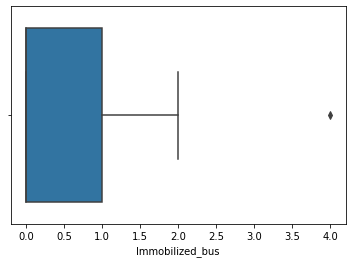

In [192]:
sns.boxplot('Immobilized_bus', data = df)

#### Exploratory Analysis for Broken_Truck

In [193]:
df.Broken_Truck.unique()

array([   0., 1000.,    2.,    1.,    5.,    4.,    3.])

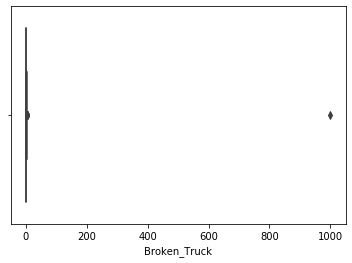

In [194]:
sns.boxplot('Broken_Truck', data = df)

#### Exploratory Analysis for Vehicle_excess

In [195]:
df.Vehicle_excess.unique()

array([1, 0])

In [196]:
df.replace(to_replace=' f', value= " F", inplace = True)

In [197]:
df.Vehicle_excess.unique()

array([1, 0])

In [198]:
# Converting Yes to 1 and No to 0
df['Vehicle_excess'] = df['Vehicle_excess'].map({' T': 1, ' F': 0})

In [199]:
df.Vehicle_excess.unique()

array([nan])

#### Exploratory Analysis for Accident_victim

In [138]:
df.Accident_victim.unique()

array([' 0.0', ' 1.0', ' 2.0', ' 3.0', ' -0.0', ' '], dtype=object)

In [139]:
df.replace(to_replace=' -0.0', value= '0.0', inplace = True)

In [166]:
df.Accident_victim.unique()

array([' NO', ' YES', ' 2.0', ' 3.0', '0.0', ' '], dtype=object)

In [ ]:
#TODO  Fill ' ' values with mean ... no suspecious outliers so replacing with mean is OK here.

#### Exploratory Analysis for Running_over

In [188]:
df.Running_over.unique()

array([' NO', ' YES', ' 2.0'], dtype=object)

In [190]:
df.Running_over.unique()

array([' NO', ' YES', ' 2.0'], dtype=object)

In [176]:
df.replace(to_replace=' NO', value= ' 0.0', inplace = True)

In [177]:
df.Running_over.unique()

array([' 0.0', ' YES', ' 2.0'], dtype=object)

#### Exploratory Analysis for Fire_vehicles

In [182]:
df.Fire_vehicles.unique()

array([' 0.0', ' YES'], dtype=object)

In [183]:
#Fire_vehicles looks like categorical

In [184]:
df.replace(to_replace=' 0.0', value= ' NO', inplace = True)

In [185]:
df.Fire_vehicles.unique()

array([' NO', ' YES'], dtype=object)

In [186]:
# Converting Yes to 1 and No to 0
df['Fire_vehicles'] = df['Fire_vehicles'].map({' YES': 1, ' NO': 0})

In [187]:
df.Fire_vehicles.unique()

array([0, 1])

#### Exploratory Analysis for Occurrence_involving_freight

In [149]:
df.Occurrence_involving_freight.unique()

array([0., 1.])

#### Exploratory Analysis for Incident_involving_dangerous_freight

In [150]:
df.Incident_involving_dangerous_freight.unique()

array([' NO', ' 1.0', ' '], dtype=object)

In [151]:
df.replace(to_replace=' 1.0', value= ' YES', inplace = True)

In [152]:
df.Incident_involving_dangerous_freight.unique()

array([' NO', ' YES', ' '], dtype=object)

In [ ]:
# TODO ' ' 

#### Exploratory Analysis for Lack_of_electricity

In [153]:
df.Lack_of_electricity.unique()

array([0., 1., 2., 4., 3.])

In [ ]:
# TODO ... should have been categorical

#### Exploratory Analysis for Fire

In [154]:
df.Fire.unique()

array([0., 1.])

In [ ]:
#TODO categorical 

#### Exploratory Analysis for Point_of_flooding

In [118]:
df.Point_of_flooding.unique()

array([0.e+00, 2.e+03, 1.e+00, 3.e+00, 7.e+00])

#### Exploratory Analysis for Manifestations

In [155]:
df.Manifestations.unique()

array([ 0.,  1., -1.])

#### Exploratory Analysis for Defect_in_the_network_of_trolleybuses

In [120]:
df.Defect_in_the_network_of_trolleybuses.unique()

array([' NO', ' YES', ' 3.0', ' 2.0', ' -8.0', ' '], dtype=object)

#### Exploratory Analysis for  Tree_on_the_road

In [121]:
df.Tree_on_the_road.unique()

array([0., 1.])

#### Exploratory Analysis for Semaphore_off

In [122]:
df.Semaphore_off.unique()

array([' NO', ' YES', ' 2.0', ' 4.0', ' '], dtype=object)

#### Exploratory Analysis for Intermittent_Semaphore

In [156]:
df.Intermittent_Semaphore.unique()

array([0., 1.])

# Ignore Sections below

In [10]:
data.isnull().sum()

Hour                                     0
Immobilized_bus                          0
Broken_Truck                             0
Vehicle_excess                           0
Accident_victim                          0
Running_over                             0
Fire_vehicles                            0
Occurrence_involving_freight             0
Incident_involving_dangerous_freight     0
Lack_of_electricity                      0
Fire                                     0
Point_of_flooding                        0
Manifestations                           0
Defect_in_the_network_of_trolleybuses    0
Tree_on_the_road                         0
Semaphore_off                            0
Intermittent_Semaphore                   0
Slowness_in_traffic_percent              0
dtype: int64

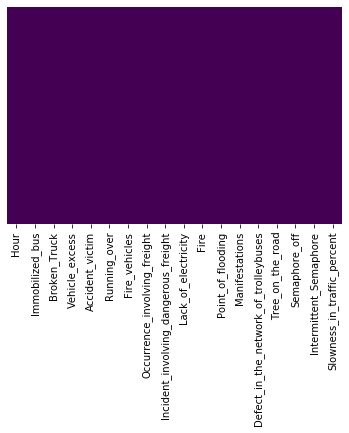

In [11]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [12]:
data.isnull().any().any()

False

In [13]:
data.describe()

,Immobilized_bus,Broken_Truck,Occurrence_involving_freight,Lack_of_electricity,Fire,Point_of_flooding,Manifestations,Tree_on_the_road,Intermittent_Semaphore,Slowness_in_traffic_percent
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,0.335714,8.007143,0.007143,0.114286,0.007143,14.400000,0.035714,0.042857,0.014286,9.980714
std,0.652728,84.448912,0.084515,0.495820,0.084515,169.022573,0.221529,0.203262,0.119092,4.323583
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,3.400000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.300000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.950000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.500000
max,4.000000,1000.000000,1.000000,4.000000,1.000000,2000.000000,1.000000,1.000000,1.000000,23.400000


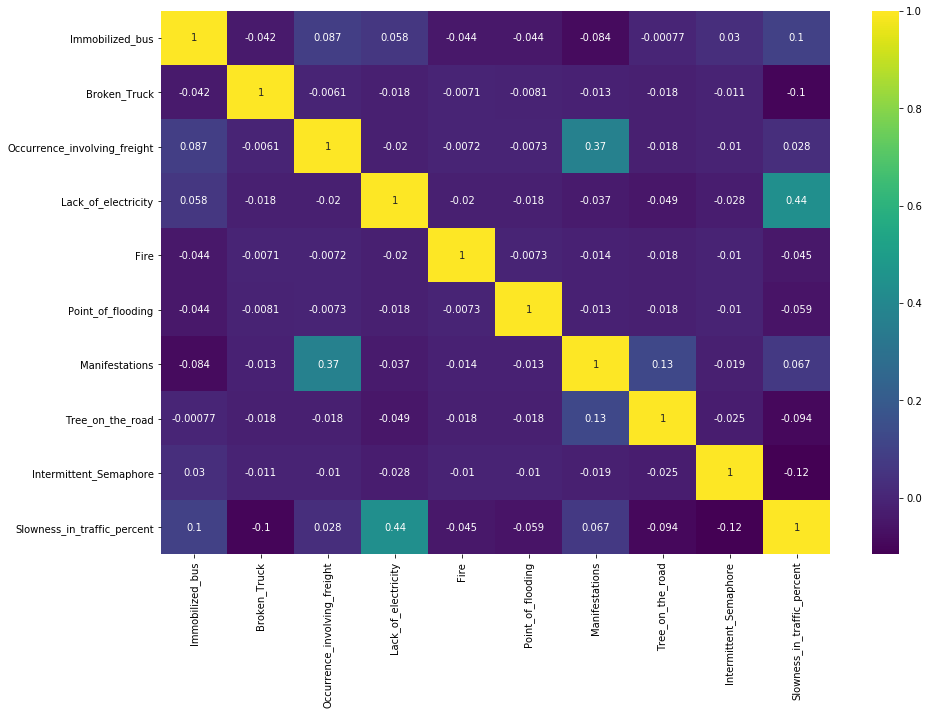

In [15]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, cmap='viridis')

In [17]:
print(data.corr())

                              Immobilized_bus  Broken_Truck  \
Immobilized_bus                      1.000000     -0.041939   
Broken_Truck                        -0.041939      1.000000   
Occurrence_involving_freight         0.086631     -0.006055   
Lack_of_electricity                  0.058432     -0.018232   
Fire                                -0.043781     -0.007063   
Point_of_flooding                   -0.044003     -0.008121   
Manifestations                      -0.083515     -0.013473   
Tree_on_the_road                    -0.000775     -0.018040   
Intermittent_Semaphore               0.030409     -0.010740   
Slowness_in_traffic_percent          0.101221     -0.102297   

                              Occurrence_involving_freight  \
Immobilized_bus                                   0.086631   
Broken_Truck                                     -0.006055   
Occurrence_involving_freight                      1.000000   
Lack_of_electricity                              -0.019621